In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import calendar


In [2]:
#read data
insitu_data = pd.read_csv(r'C:\Users\visan\Downloads\insitu data\bre_DEHB004_20200101-20201231.csv',sep =';',usecols=[0,2],header = 3)
#rename the column for convenience(NO2 column was named as stundenwerte.1)   
insitu_data.rename(columns={'Stundenwerte.1':'NO2'}, inplace=True)
insitu_data.rename(columns={'Messzeit (Angaben in MESZ bzw. MEZ)':'datetime'}, inplace=True)
# Since unit of time is MEZ(UTC+1),so,subtract 1 from time axis so that unit is UTC.
subtract_time = 1
insitu_data['datetime']=pd.to_datetime(insitu_data['datetime'],format='%d.%m.%Y %H:%M')-datetime.timedelta(hours=subtract_time)
# converting column into string
insitu_data['datetime'] = insitu_data['datetime'].astype(str)
insitu_data[['date', 'time']] =insitu_data['datetime'].str.split(' ',1,  expand=True)
#print(insitu_data)

## A.1 Hourly mean NO2 column averaged over all viewing directions

In [3]:
# let's add hour column in data set
hr=[]
for i in insitu_data['time']:
    hour = str(i[0:2])
    hr.append(int(hour))
insitu_data['hour']=hr
#insitu_data.append(insitu_data_day)
#print(insitu_data)

In [4]:
# let's add month and day of week column in data set
mon = []
day_week_name = []
for i in insitu_data['date']:
    month = str(i[5:7])
    day = str(i[8:10])
    mon.append(int(month))
    day_date = datetime.date(2020, int(month), int(day)) 
    day_name=day_date.strftime("%A")
    #print(day_name)
    day_week_name.append(day_name)
insitu_data['month']=mon
insitu_data['day of week']=day_week_name
insitu_data['day of week'][0]= 'Tuesday'
#print(insitu_data)

C:\Users\visan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


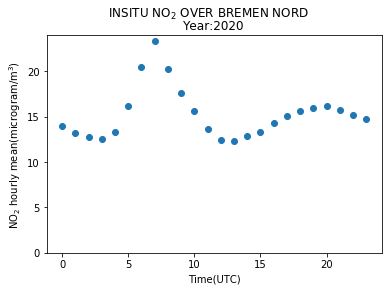

In [17]:
NO2_year=[]
time_year=[]
#MIN_COUNT=15
#count = []
for j in range(0,24):# (0,24);0 A.M. is the starting time of the day and 23 P.M. is the ending one through ALL months
    #if (insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1)), 'NO2'].count()) > MIN_COUNT:
    time_year.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1)), 'hour'].mean()) 
    NO2_year.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1)), 'NO2'].mean())
    #count.append(insitu_data_day.loc[(insitu_data_day['hour']>=j) & (insitu_data_day['hour']<(j+1)), 'hour'].count())
#print(count)
#print(len(time_year))
plt.scatter(time_year,NO2_year)
plt.ylim(bottom=0)
plt.suptitle('INSITU NO$_2$ OVER BREMEN NORD')
plt.title('Year:2020') 
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ hourly mean(microgram/m$^3$)')
plt.show()

## A.2 Hourly mean NO2 column averaged over all viewing directions separated data by weekdays and weekends

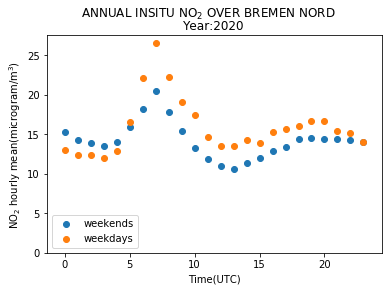

In [26]:
time_weekend=[]
NO2_weekend=[]
time_week=[]
NO2_week=[]
day_week_name='Saturday'or 'Sunday'
for j in range(0,24):
    time_weekend.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_weekend.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())


day_week_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(0,24):
    time_week.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_week.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2'].mean())

plt.scatter(time_weekend,NO2_weekend,label= 'weekends')
plt.scatter(time_week,NO2_week,label= 'weekdays')
plt.legend()
plt.legend(loc = 'lower left')
plt.ylim(bottom=0)
#plt.ylim(top=9*1e16)
plt.suptitle('ANNUAL INSITU NO$_2$ OVER BREMEN NORD')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ hourly mean(microgram/m$^3$)')
plt.show()



## A.3 Monthly average of NO2 column

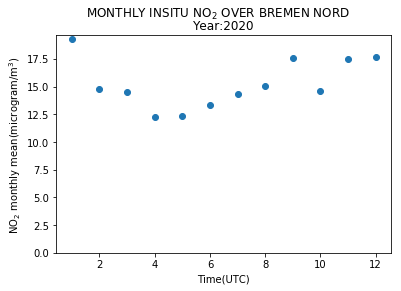

In [19]:
time_month=[]
NO2_month=[]

for month in range(1,13):
    time_month.append(insitu_data.loc[ (insitu_data['month']==month) , 'month'].mean())
    #print(time_month)
    NO2_month.append(insitu_data.loc[(insitu_data['month']==month) , 'NO2'].mean())

plt.scatter(time_month,NO2_month)
plt.ylim(bottom = 0)
plt.suptitle('MONTHLY INSITU NO$_2$ OVER BREMEN NORD')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ monthly mean(microgram/m$^3$)')
plt.show()

## A.4 Add a time of day figure including 4 lines, one for each season for NO2 column

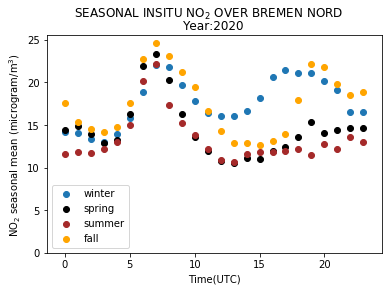

In [20]:
time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]



month=12 or 1 or 2
for j in range(0,24):
    time_DJF.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_DJF.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())
    #print(len(NO2_DJF))
    

month=3 or 4 or 5 
for j in range(0,24):
    time_MAM.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_MAM.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())


month=6 or 7 or 8 
for j in range(0,24):
    time_JJA.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_JJA.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())


month=9 or 10 or 11 
for j in range(0,24):
    time_SON.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_SON.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2'].mean())
    #print(len(NO2_SON))
    
    
plt.scatter(time_DJF,NO2_DJF, label = 'winter')
plt.scatter(time_MAM,NO2_MAM, label = 'spring', color = 'black')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'brown')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'orange')
plt.legend()
plt.ylim(bottom=0)
plt.suptitle('SEASONAL INSITU NO$_2$ OVER BREMEN NORD')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ seasonal mean (microgram/m$^3$)')
plt.show()

In [5]:
VMR_NO2 = insitu_data['NO2']/1.88 #1 ppb = 1.88 µg/m3
#print(VMR_NO2)
insitu_data['NO2_VMR'] = VMR_NO2 
#insitu_data

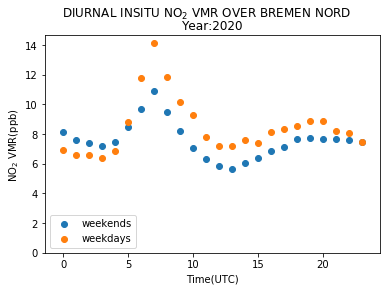

In [27]:
time_weekend=[]
NO2_weekend=[]
time_week=[]
NO2_week=[]
day_week_name='Saturday'or 'Sunday'
for j in range(0,24):
    time_weekend.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_weekend.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2_VMR'].mean())
#print(time_weekend)

day_week_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(0,24):
    time_week.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'hour'].mean()) 
    NO2_week.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['day of week']==day_week_name), 'NO2_VMR'].mean())

plt.scatter(time_weekend,NO2_weekend,label= 'weekends')
plt.scatter(time_week,NO2_week,label= 'weekdays')
plt.legend()
plt.legend(loc = 'lower left')
plt.ylim(bottom=0)
#plt.ylim(top=9*1e16)
plt.suptitle('DIURNAL INSITU NO$_2$ VMR OVER BREMEN NORD')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]
24
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


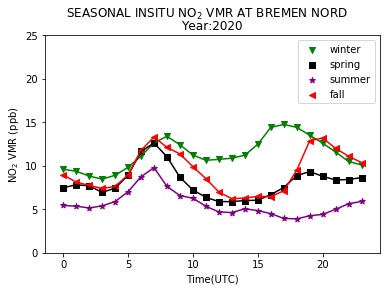

In [6]:
time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]



month=12 or 1 or 2
for j in range(0,24):
    time_DJF.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_DJF.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2_VMR'].mean())
print(time_DJF)
print(len(time_DJF))
    

month=3 or 4 or 5 
for j in range(0,24):
    time_MAM.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_MAM.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2_VMR'].mean())
print(time_MAM)

month=6 or 7 or 8 
for j in range(0,24):
    time_JJA.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_JJA.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2_VMR'].mean())


month=9 or 10 or 11 
for j in range(0,24):
    time_SON.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'hour'].mean()) 
    NO2_SON.append(insitu_data.loc[(insitu_data['hour']>=j) & (insitu_data['hour']<(j+1))&(insitu_data['month']==month), 'NO2_VMR'].mean())
    #print(len(NO2_SON))
    
    
plt.scatter(time_DJF,NO2_DJF, label = 'winter',color = 'green', marker ='v')
plt.plot(time_DJF,NO2_DJF,color = 'green')
plt.scatter(time_MAM,NO2_MAM, label = 'spring',color = 'black',marker ='s')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'purple',marker ='*')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'red',marker ='<')
plt.plot(time_MAM,NO2_MAM, color = 'black')
plt.plot(time_JJA,NO2_JJA,  color = 'purple')
plt.plot(time_SON,NO2_SON, color = 'red')
plt.legend()
plt.ylim(bottom=0)
plt.ylim(0,25)
plt.suptitle('SEASONAL INSITU NO$_2$ VMR AT BREMEN NORD')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR (ppb)')
plt.show()